In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# load dataset
df = pd.read_csv('../files/BreastCancerWc.csv')
print(df.columns)
df.head()

Index(['1000025', '5', '1', '1.1', '1.2', '2', '1.3', '3', '1.4', '1.5',
       '2.1'],
      dtype='object')


,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [13]:
# Step 2: Data Cleaning (Remove NA, '?', Negative values)
# Rename the columns for better readability
df.columns = ['SampleCodeNumber', 'ClumpThickness', 'UniformityCellSize', 'UniformityCellShape',
              'MarginalAdhesion', 'SingleEpithelialCellSize', 'BareNuclei', 'BlandChromatin',
              'NormalNucleoli', 'Mitoses', 'Class']

# Replace '?' with NaN and handle missing values
df.replace('?', np.nan, inplace=True)

# Convert columns to numeric values, coercing errors into NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

# Remove negative values (if any) by clipping them to 0 (assuming negative values are erroneous)
df[df.select_dtypes(include=[np.number]).columns] = df.select_dtypes(include=[np.number]).clip(lower=0)

# Step 3: Error Correcting (Outlier Detection and Removal)
# Calculate the IQR (Interquartile Range) for detecting outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filter out rows where any attribute is outside the IQR bounds
df_filtered = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Step 4: Data Transformation (Scaling the Features)
# Separate the features (X) and target (y)
X = df_filtered.drop(columns=['Class'])  # Exclude the target column
y = df_filtered['Class']  # Target column: 'Class' (Benign=2, Malignant=4)

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for algorithms like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Build Data Models (Logistic Regression and Naïve Bayes)

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_scaled, y_train)

# Naïve Bayes Model
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# Step 6: Predict and Evaluate Model Performance

# Predictions for Logistic Regression
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Predictions for Naïve Bayes
y_pred_nb = nb.predict(X_test_scaled)

# Calculate accuracy for both models
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
nb_accuracy = accuracy_score(y_test, y_pred_nb)

# Print the accuracy of both models
print(f"Logistic Regression Accuracy: {log_reg_accuracy * 100:.2f}%")
print(f"Naïve Bayes Accuracy: {nb_accuracy * 100:.2f}%")

# Step 7: Confusion Matrix and Classification Report for both models
print("\nConfusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_pred_log_reg))

print("\nConfusion Matrix (Naïve Bayes):")
print(confusion_matrix(y_test, y_pred_nb))

# Display classification report for both models
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_log_reg))

print("\nClassification Report (Naïve Bayes):")
print(classification_report(y_test, y_pred_nb))

Logistic Regression Accuracy: 96.50%
Naïve Bayes Accuracy: 95.10%

Confusion Matrix (Logistic Regression):
[[127   1]
 [  4  11]]

Confusion Matrix (Naïve Bayes):
[[122   6]
 [  1  14]]

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           2       0.97      0.99      0.98       128
           4       0.92      0.73      0.81        15

    accuracy                           0.97       143
   macro avg       0.94      0.86      0.90       143
weighted avg       0.96      0.97      0.96       143


Classification Report (Naïve Bayes):
              precision    recall  f1-score   support

           2       0.99      0.95      0.97       128
           4       0.70      0.93      0.80        15

    accuracy                           0.95       143
   macro avg       0.85      0.94      0.89       143
weighted avg       0.96      0.95      0.95       143



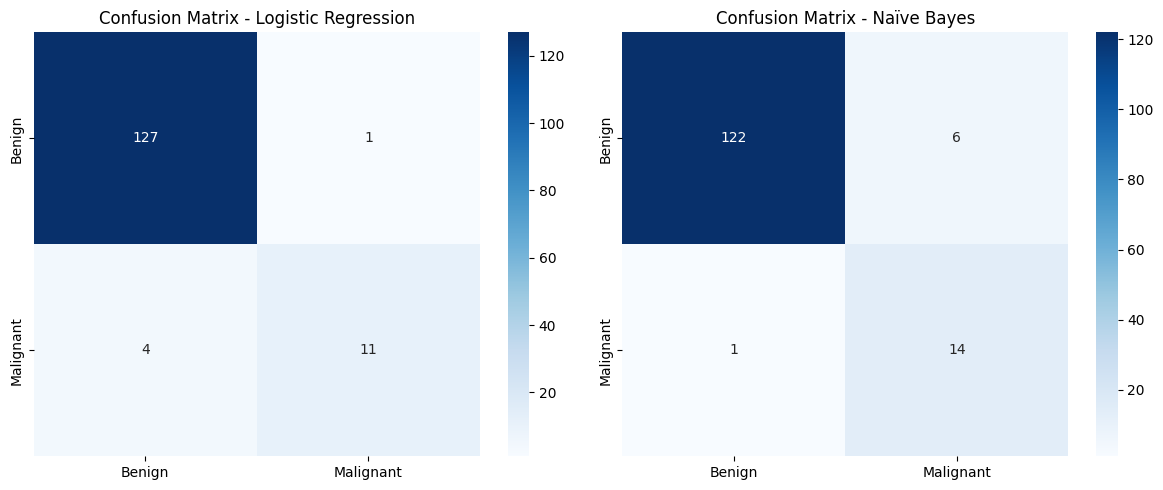

In [14]:
# Step 8: Visualizing Results (Confusion Matrix Heatmap)
plt.figure(figsize=(12, 5))

# Logistic Regression Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix - Logistic Regression')

# Naïve Bayes Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix - Naïve Bayes')

plt.tight_layout()
plt.show()